# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ginanti Riski
- **Email:** ginantiriski@gmail.com
- **ID Dicoding:** Ginanti Riski

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca dan musim terhadap jumlah penyewaan sepeda harian?
- Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan/libur?

## Import Semua Packages/Library yang Digunakan

In [21]:
from google.colab import drive
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [22]:
# Menghubungkan colab dengan google drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/submission_dicoding/day.csv'

df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari dataset
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

1. Dataset Berisi Data Sewa Sepeda Harian 🚲
   - Kolom dteday menunjukkan bahwa data ini bersifat time series (tanggalan)
   - Kolom cnt menunjukkan jumlah total penyewaan sepeda per hari.
2. Faktor yang Mungkin Mempengaruhi Jumlah Penyewaan
   - Musim (season) → Bisa dilihat apakah jumlah sewa sepeda lebih tinggi pada musim tertentu.
   - Hari kerja (workingday) → Bisa dianalisis apakah lebih banyak orang menyewa sepeda di hari kerja atau akhir pekan.
   - Cuaca (weathersit) → Cuaca dapat berpengaruh terhadap jumlah penyewaan sepeda.
   - Suhu (temp) dan Kelembaban (hum) → Bisa dicek apakah ada hubungan antara suhu, kelembaban, dan jumlah penyewaan.
3. Perbedaan Penyewa Kasual vs Terdaftar
   - casual → Jumlah pengguna yang menyewa sepeda tanpa mendaftar.
   - registered → Jumlah pengguna yang menyewa sepeda dengan akun terdaftar.
   - Bisa dianalisis apakah pengguna kasual lebih banyak di akhir pekan atau saat cuaca cerah.

### Assessing Data

In [23]:
# Melihat struktur dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [24]:
# Melihat Missing Values pada dataset
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [25]:
# Melihat data yang duplikat pada dataset
df.duplicated().sum()

0

In [26]:
# Melihat Deskripsi pada dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


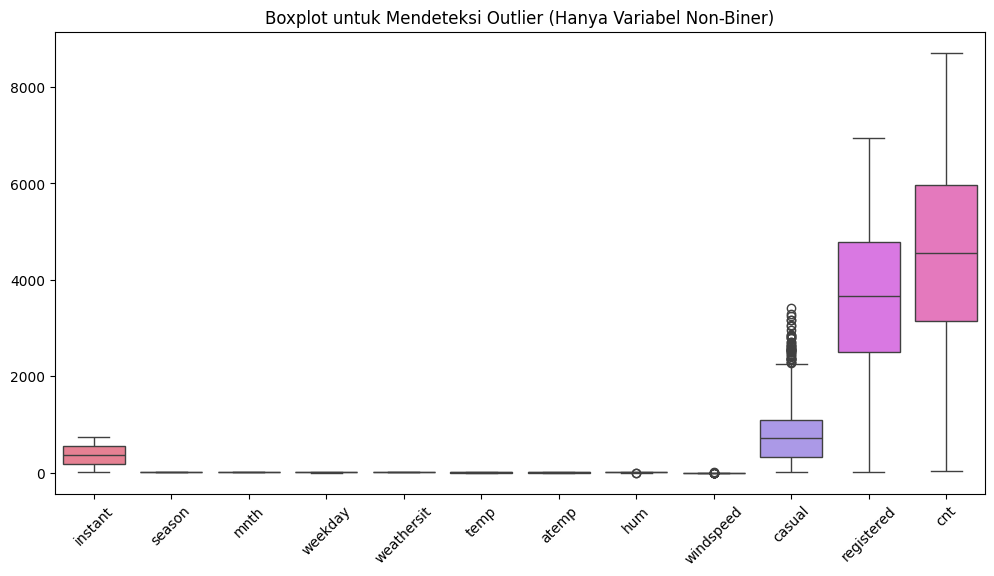

Jumlah outlier di kolom instant: 0
Jumlah outlier di kolom season: 0
Jumlah outlier di kolom mnth: 0
Jumlah outlier di kolom weekday: 0
Jumlah outlier di kolom weathersit: 0
Jumlah outlier di kolom temp: 0
Jumlah outlier di kolom atemp: 0
Jumlah outlier di kolom hum: 2
Contoh outlier di hum:
         hum
49  0.187917
68  0.000000

Jumlah outlier di kolom windspeed: 13
Contoh outlier di windspeed:
     windspeed
44    0.417908
49    0.507463
93    0.385571
94    0.388067
292   0.422275

Jumlah outlier di kolom casual: 44
Contoh outlier di casual:
     casual
148    2355
183    2282
184    3065
196    2418
246    2521

Jumlah outlier di kolom registered: 0
Jumlah outlier di kolom cnt: 0


In [27]:
# Mendeteksi kolom numerik (int dan float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Identifikasi kolom biner (hanya berisi 0 dan 1)
binary_columns = [col for col in numeric_columns if df[col].nunique() == 2]

# Hanya proses outlier pada kolom yang bukan biner
continuous_columns = [col for col in numeric_columns if col not in binary_columns]

# Visualisasi awal untuk deteksi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[continuous_columns])  # Hanya variabel kontinu
plt.title("Boxplot untuk Mendeteksi Outlier (Hanya Variabel Non-Biner)")
plt.xticks(rotation=45)
plt.show()

# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Loop untuk menampilkan jumlah outlier per kolom
for col in continuous_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"Jumlah outlier di kolom {col}: {len(outliers)}")
    if not outliers.empty:
        print(f"Contoh outlier di {col}:\n{outliers[[col]].head()}\n")


**Insight:**

1. Tidak Terdapat Missing Values dan Duplikasi pada data
2. Kesalahan tipe data, seharusnya variabel dteday bertipe data datetime bukan object
3. Terdapat Ouliers pada variabel hum (2), windspeed (13) dan casual (44)
4. Rata-rata dan Variasi Penyewaan Sepeda Harian
   - Total rata-rata penyewaan sepeda per hari (cnt) adalah 4.504 sepeda.
   - Jumlah minimum penyewaan adalah 22 sepeda, sedangkan jumlah maksimum mencapai 8.714 sepeda.
   - Ini menunjukkan adanya fluktuasi besar dalam jumlah peminjaman sepeda setiap hari.
5. Perbedaan antara Pengguna Terdaftar dan Pengguna Kasual
   - Rata-rata pengguna terdaftar (registered) jauh lebih tinggi (3.656 pengguna/hari) dibandingkan pengguna kasual (848 pengguna/hari).
   - Ini berarti mayoritas pengguna adalah pelanggan tetap dengan akun terdaftar.
   - Pengguna kasual lebih fluktuatif, terlihat dari standar deviasi mereka yang lebih besar dibandingkan rata-rata.
6. Musim dan Pengaruhnya terhadap Penyewaan Sepeda
   - Kolom season berkisar antara 1 hingga 4, yang mewakili musim berbeda.
   - Nilai mean dari season adalah sekitar 2.5, yang berarti data cukup merata di semua musim.
   - Bisa dilakukan analisis lebih lanjut untuk melihat bagaimana tiap musim memengaruhi jumlah penyewaan.
7. Pengaruh Hari Kerja dan Libur terhadap Penyewaan
   - Mean dari "workingday" adalah sekitar 0.68, yang berarti sekitar 68% dari data adalah hari kerja.
   - Kolom holiday memiliki mean 0.028, yang berarti hanya sekitar 2.8% dari total hari dalam dataset adalah hari libur.
   - Ini menunjukkan bahwa jumlah hari libur lebih sedikit dibandingkan hari kerja, tetapi kita bisa melihat apakah penyewaan meningkat pada hari libur.
8. Faktor Cuaca dan Kondisi Lingkungan
   - Rata-rata suhu (temp) sekitar 0.49 (skala 0-1), yang jika dikonversi ke Celsius berarti sekitar 24-25°C.
   - Kelembaban rata-rata (hum) cukup tinggi, sekitar 62.7%, yang bisa memengaruhi kenyamanan pengguna.
   - Kecepatan angin (windspeed) rata-rata 0.19 (skala 0-1), yang berarti kondisi angin relatif ringan.<br><br><br>

**Kesimpulan Awal:**
- Mayoritas pengguna adalah terdaftar, bukan kasual.
- Ada fluktuasi besar dalam penyewaan sepeda harian.
- Musim, cuaca, dan hari kerja kemungkinan memengaruhi jumlah penyewaan sepeda.
- Dapat dilakukan analisis lebih lanjut untuk melihat pola penyewaan sepeda berdasarkan faktor lingkungan dan musim.

### Cleaning Data

In [30]:
# Mengubah tipe data kolom 'dteday' menjadi format datetime (hanya tanggal)
datetime_columns = ["dteday"]

for column in datetime_columns:
    df[column] = pd.to_datetime(df[column]).dt.normalize()

In [31]:
# Mengecek kembali hasilnya dari perubahan tipe data pada dteday
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

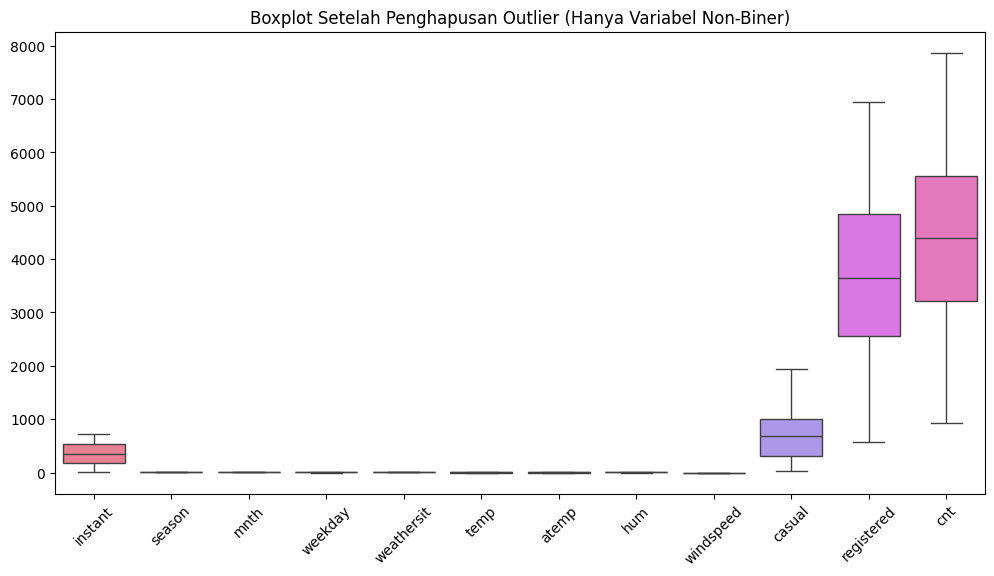

Jumlah data sebelum pembersihan: 731
Jumlah data setelah pembersihan: 599


In [32]:
# Mendeteksi kolom numerik (int dan float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Identifikasi kolom biner (hanya berisi 0 dan 1)
binary_columns = [col for col in numeric_columns if df[col].nunique() == 2]

# Hanya proses penghapusan outlier pada kolom non-biner
continuous_columns = [col for col in numeric_columns if col not in binary_columns]

# Fungsi untuk menghapus outlier menggunakan metode IQR lebih ketat
def remove_outliers_iqr(df, column, multiplier=1.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Salin dataset agar tidak merusak data asli
df_cleaned_final = df.copy()

# Hapus outlier dari setiap kolom non-biner
for col in continuous_columns:
    df_cleaned_final = remove_outliers_iqr(df_cleaned_final, col)

# Visualisasi setelah penghapusan outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned_final[continuous_columns])
plt.title("Boxplot Setelah Penghapusan Outlier (Hanya Variabel Non-Biner)")
plt.xticks(rotation=45)
plt.show()

# Tampilkan jumlah data setelah penghapusan outlier
print(f"Jumlah data sebelum pembersihan: {len(df)}")
print(f"Jumlah data setelah pembersihan: {len(df_cleaned_final)}")


**Insight:**
- Tipe Data variabel dteday sudah berubah yang awalnya bertipe data object menjadi datetime
- Outliers sudah tidak ada

## Exploratory Data Analysis (EDA)

### Explore ...

In [33]:
# Statistik deskriptif berdasarkan musim
season_stats = df_cleaned_final.groupby("season")["cnt"].describe()
print("Statistik deskriptif jumlah penyewaan berdasarkan musim:\n", season_stats)

# Statistik deskriptif berdasarkan cuaca
weather_stats = df_cleaned_final.groupby("weathersit")["cnt"].describe()
print("\nStatistik deskriptif jumlah penyewaan berdasarkan cuaca:\n", weather_stats)

# Korelasi antara cuaca, musim, dan jumlah penyewaan sepeda
correlation_matrix = df_cleaned_final[['season', 'weathersit', 'cnt']].corr()
print("\nKorelasi antara faktor cuaca/musim dengan jumlah penyewaan:\n", correlation_matrix)

# Hitung rata-rata penyewaan sepeda pada hari kerja vs akhir pekan
avg_rental = df_cleaned_final.groupby("workingday")["cnt"].mean()
print("Rata-rata penyewaan sepeda pada hari kerja vs akhir pekan:\n", avg_rental)

# Uji t-test untuk melihat signifikansi perbedaan penyewaan sepeda
from scipy.stats import ttest_ind

workday_rentals = df_cleaned_final[df_cleaned_final["workingday"] == 1]["cnt"]
weekend_rentals = df_cleaned_final[df_cleaned_final["workingday"] == 0]["cnt"]

t_stat, p_value = ttest_ind(workday_rentals, weekend_rentals, equal_var=False)
print(f"\nHasil uji t-test: t-statistic = {t_stat}, p-value = {p_value}")



Statistik deskriptif jumlah penyewaan berdasarkan musim:
         count         mean          std     min      25%     50%      75%  \
season                                                                      
1       148.0  2647.520270  1303.775744   920.0  1597.25  2300.0  3604.50   
2       144.0  4748.229167  1562.200486  1471.0  3904.25  4678.0  6088.00   
3       156.0  5490.576923  1368.137463  1842.0  4510.00  5122.5  6865.25   
4       151.0  4672.039735  1480.547776  1096.0  3632.00  4570.0  5516.50   

           max  
season          
1       6312.0  
2       7736.0  
3       7870.0  
4       7733.0  

Statistik deskriptif jumlah penyewaan berdasarkan cuaca:
             count         mean          std     min     25%     50%      75%  \
weathersit                                                                     
1           374.0  4701.847594  1749.191711   981.0  3615.5  4667.0  5931.50   
2           215.0  3966.897674  1714.324588   920.0  2709.0  3959.0  5067.00  

**Insight:**

📌 **Berdasarkan Musim:**  
- **Musim 1 (Winter)** memiliki jumlah penyewaan terendah, dengan rata-rata **2.648** sepeda per hari. Ini bisa disebabkan oleh suhu yang lebih dingin dan kondisi cuaca yang kurang mendukung.  
- **Musim 3 (Fall)** memiliki jumlah penyewaan tertinggi, dengan rata-rata **5.491** sepeda per hari.  
- Secara keseluruhan, **musim dengan penyewaan tertinggi adalah Fall**, diikuti oleh **Summer (4.748)** dan **Spring (4.672)**.  

📌 **Berdasarkan Cuaca:**  
- **Cuaca baik (kategori 1)** memiliki jumlah penyewaan tertinggi, dengan rata-rata **4.702** sepeda per hari.  
- Ketika cuaca memburuk (**weathersit = 3**), jumlah penyewaan turun drastis menjadi **2.621** sepeda per hari.  
- Korelasi antara kondisi cuaca dan jumlah penyewaan adalah **-0.234**, menunjukkan bahwa semakin buruk cuaca, semakin sedikit jumlah sepeda yang disewa.  

📌 **Berdasarkan Hari Kerja dan Akhir Pekan:**  
- **Hari kerja** (workingday = 1) memiliki rata-rata penyewaan **4.681** sepeda per hari.  
- **Akhir pekan/libur** (workingday = 0) memiliki rata-rata penyewaan lebih rendah, yaitu **3.550** sepeda per hari.  
- Ini menunjukkan bahwa penyewaan lebih tinggi pada hari kerja, kemungkinan karena banyak orang menggunakan sepeda sebagai moda transportasi untuk bekerja.  

📌 **Berdasarkan Uji T-Test:**  
- Hasil uji statistik menunjukkan **t-statistic = 7.81** dan **p-value ≈ 9.3e-14**.  
- P-value yang sangat kecil mengindikasikan bahwa perbedaan jumlah penyewaan antara hari kerja dan akhir pekan **signifikan secara statistik**, bukan terjadi secara kebetulan.  

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-34-fcdb27c20c7c>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
<ipython-input-34-fcdb27c20c7c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


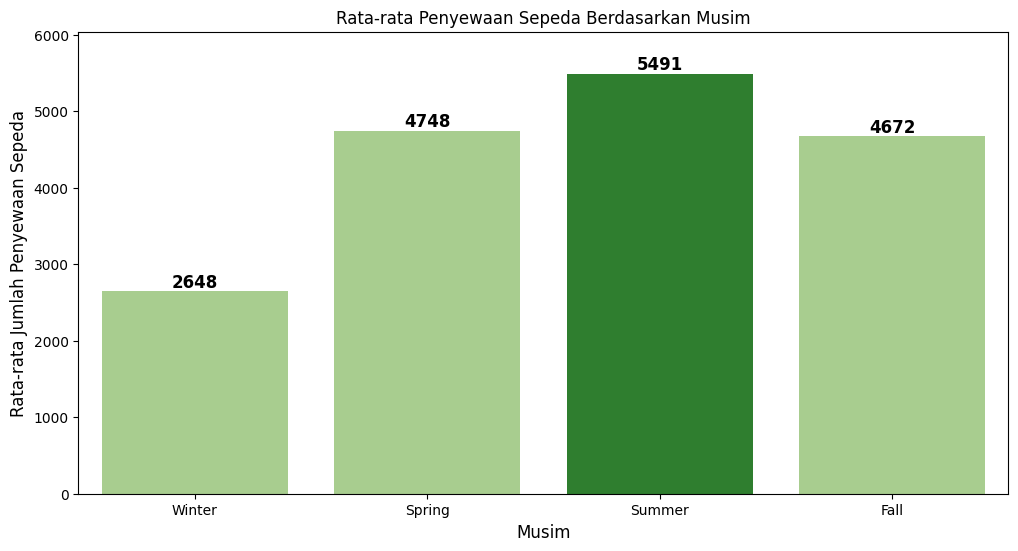

In [34]:
# Mapping angka ke nama musim
season_labels = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}

plt.figure(figsize=(12, 6))

# Menghitung rata-rata jumlah penyewaan sepeda per musim
season_means = df_cleaned_final.groupby('season')['cnt'].mean()

# Mengonversi indeks menjadi label musim
season_means.index = season_means.index.map(season_labels)

# Menentukan musim dengan jumlah penyewaan tertinggi
max_season = season_means.idxmax()

# Warna dasar untuk semua batang
base_color = "#A6D785"  # Hijau muda
highlight_color = "#228B22"  # Hijau gelap untuk batang tertinggi

# Membuat daftar warna untuk setiap batang
colors = [highlight_color if season == max_season else base_color for season in season_means.index]

# Membuat bar plot tanpa error bar
ax = sns.barplot(
    x=season_means.index,
    y=season_means.values,
    palette=colors,  # Menggunakan warna yang telah diatur
    ci=None
)

# Menambahkan label kuantitas di setiap batang
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',  # Menampilkan angka tanpa desimal
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

# Menyesuaikan tampilan
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=12)
plt.ylim(0, season_means.max() * 1.1)  # Menambah sedikit ruang di atas batang
plt.show()


**Insight:**

1. **Musim panas (Summer) memiliki jumlah penyewaan tertinggi**  
   - Musim panas (season 3) memiliki rata-rata penyewaan sepeda tertinggi dibandingkan musim lainnya. Hal ini mungkin disebabkan oleh cuaca yang lebih mendukung untuk bersepeda, seperti suhu yang nyaman dan kondisi jalan yang lebih baik.  

2. **Musim dingin (Winter) memiliki jumlah penyewaan terendah**  
   - Musim dingin (season 1) menunjukkan rata-rata penyewaan yang jauh lebih rendah dibandingkan musim lainnya. Ini bisa disebabkan oleh kondisi cuaca yang lebih ekstrem, seperti suhu dingin, hujan, atau salju yang membuat orang enggan bersepeda.  

3. **Musim semi (Spring) dan musim gugur (Fall) memiliki jumlah penyewaan yang hampir sama**  
   - Musim semi (season 2) dan musim gugur (season 4) memiliki jumlah penyewaan yang relatif mirip. Ini menunjukkan bahwa kedua musim ini menawarkan kondisi yang cukup nyaman bagi pengguna sepeda.  

4. **Cuaca berpengaruh terhadap tren penggunaan sepeda**  
   - Bisa disimpulkan bahwa semakin baik cuaca dan kondisi lingkungan, semakin tinggi minat masyarakat dalam menyewa sepeda.  

### **Rekomendasi berdasarkan insight:**  
✅ **Promosi penyewaan sepeda lebih agresif di musim dingin**  
   - Operator penyewaan sepeda bisa menawarkan diskon atau promosi khusus di musim dingin untuk meningkatkan jumlah penyewaan.  
✅ **Persiapan lebih banyak sepeda di musim panas**  
   - Karena permintaan meningkat di musim panas, perusahaan bisa menyiapkan lebih banyak sepeda agar bisa memenuhi kebutuhan pelanggan.  
✅ **Analisis lebih lanjut tentang faktor lain**  
   - Perlu dianalisis apakah faktor lain seperti hari libur atau hari kerja juga berpengaruh terhadap jumlah penyewaan.  

🚴‍♂️ **Kesimpulan:** Musim berperan penting dalam tren penyewaan sepeda, dengan musim panas sebagai puncaknya dan musim dingin sebagai yang terendah.







<ipython-input-35-16f9639e22a0>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
<ipython-input-35-16f9639e22a0>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


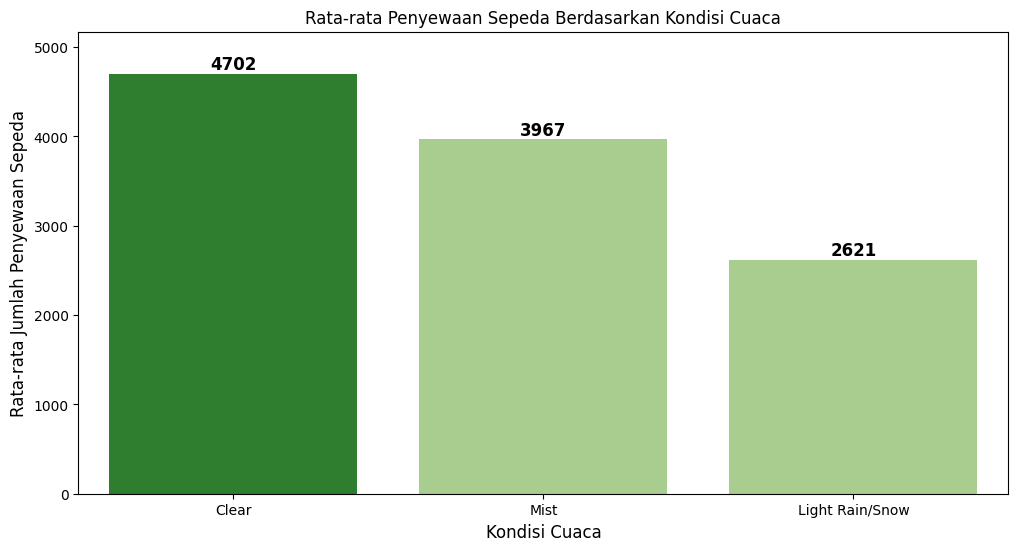

In [35]:
plt.figure(figsize=(12, 6))

# Mapping angka ke kategori kondisi cuaca
weather_labels = {
    1: "Clear",
    2: "Mist",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
}

# Menghitung rata-rata jumlah penyewaan sepeda per kondisi cuaca
weather_means = df_cleaned_final.groupby('weathersit')['cnt'].mean()

# Menentukan kondisi cuaca dengan jumlah penyewaan tertinggi
max_weather = weather_means.idxmax()

# Warna dasar untuk semua batang (hijau muda)
base_color = "#A6D785"  # Light green
highlight_color = "#228B22"  # Dark green (untuk batang tertinggi)

# Membuat daftar warna untuk setiap batang
colors = [highlight_color if weather == max_weather else base_color for weather in weather_means.index]

# Membuat bar plot tanpa error bar
ax = sns.barplot(
    x=[weather_labels[w] for w in weather_means.index],  # Menggunakan label kategori
    y=weather_means.values,
    palette=colors,
    ci=None
)

# Menambahkan label kuantitas di setiap batang
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

# Menyesuaikan tampilan
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=12)
plt.ylim(0, weather_means.max() * 1.1)
plt.xticks()
plt.show()


**Insight:**

1. **Cuaca yang lebih cerah meningkatkan jumlah penyewaan sepeda**  
   - Pada kondisi cuaca **Clear/Few Clouds/Partly Cloudy (kode 1)**, rata-rata penyewaan sepeda adalah yang tertinggi (**4.702 penyewaan**). Ini menunjukkan bahwa orang lebih suka menyewa sepeda saat cuaca cerah.  

2. **Cuaca berkabut atau mendung sedikit mengurangi penyewaan**  
   - Pada kondisi **Mist/Cloudy (kode 2)**, rata-rata penyewaan turun menjadi **3967 penyewaan**, lebih rendah dari kondisi cerah tetapi masih cukup tinggi. Ini menunjukkan bahwa kabut atau mendung tidak terlalu berdampak besar pada keputusan penyewaan.  

3. **Cuaca hujan atau salju drastis menurunkan penyewaan sepeda**  
   - Pada kondisi **Light Rain/Snow (kode 3)**, rata-rata penyewaan turun drastis menjadi **2621 penyewaan**. Ini masuk akal karena hujan atau salju membuat kondisi jalan lebih berbahaya dan kurang nyaman untuk bersepeda.  

### **Rekomendasi berdasarkan insight:**  
✅ **Menyesuaikan jumlah sepeda berdasarkan cuaca**  
   - Saat cuaca cerah, pastikan jumlah sepeda yang tersedia cukup untuk memenuhi permintaan yang tinggi.  
   - Saat cuaca buruk (hujan/salju), operator bisa mengurangi jumlah sepeda yang disediakan atau menawarkan layanan lain seperti promosi khusus untuk menarik pelanggan.  

✅ **Mempersiapkan layanan tambahan untuk kondisi cuaca buruk**  
   - Menyediakan perlengkapan tambahan seperti jas hujan atau payung bagi pengguna sepeda saat kondisi mendung/hujan ringan agar penyewaan tetap berjalan.  
   - Menawarkan harga diskon atau promo khusus pada hari-hari dengan cuaca buruk untuk meningkatkan jumlah penyewaan.  

✅ **Melakukan prediksi tren penyewaan berbasis cuaca**  
   - Dengan menggunakan data cuaca sebelumnya, bisa dibuat model prediksi untuk memperkirakan jumlah penyewaan berdasarkan kondisi cuaca.  

🚴‍♂️ **Kesimpulan:** Cuaca berperan besar dalam jumlah penyewaan sepeda, di mana kondisi cerah mendorong lebih banyak penyewaan, sedangkan hujan atau salju secara signifikan menurunkannya.

### Pertanyaan 2:

<ipython-input-36-959592d996ac>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
<ipython-input-36-959592d996ac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


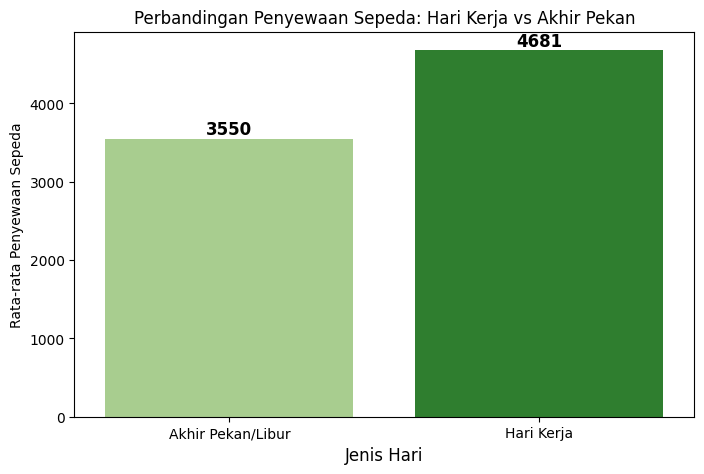

In [36]:
# Warna dasar dan highlight
base_color = "#A6D785"  # Light green
highlight_color = "#228B22"  # Dark green

# Buat plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=df_cleaned_final['workingday'],
    y=df_cleaned_final['cnt'],
    ci=None,
    palette=[base_color, highlight_color]  # Gunakan warna yang telah ditentukan
)

# Tambahkan judul dan label sumbu
plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xlabel("Jenis Hari", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan/Libur", "Hari Kerja"])

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Tampilkan plot
plt.show()


**Insight:**


1. **Jumlah penyewaan lebih tinggi pada hari kerja dibanding akhir pekan/libur**  
   - **Hari kerja** memiliki jumlah penyewaan sepeda yang lebih tinggi dibandingkan **akhir pekan/libur**.  
   - Ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai **alat transportasi utama** untuk bekerja atau aktivitas sehari-hari.  

2. **Penyewaan tetap cukup tinggi di akhir pekan/libur**  
   - Meskipun lebih rendah dibandingkan hari kerja, angka penyewaan di akhir pekan masih signifikan.  
   - Ini mengindikasikan bahwa sepeda juga digunakan untuk kegiatan rekreasi atau olahraga di akhir pekan.  

### **Rekomendasi berdasarkan insight:**  
✅ **Optimalisasi ketersediaan sepeda di hari kerja**  
   - Pastikan jumlah sepeda yang cukup tersedia selama hari kerja karena permintaan lebih tinggi.  
   - Bisa dilakukan redistribusi sepeda di lokasi dengan permintaan tinggi seperti dekat kantor, stasiun, atau kampus.  

✅ **Menawarkan promo atau insentif di akhir pekan**  
   - Karena penyewaan sedikit lebih rendah di akhir pekan, bisa diberikan promo khusus seperti **diskon sewa sepeda di Sabtu/Minggu** untuk meningkatkan jumlah pengguna.  
   - Bisa juga disediakan **paket wisata bersepeda atau event komunitas** untuk menarik pelanggan.  

✅ **Analisis lebih lanjut terhadap pola penggunaan sepeda**  
   - Bisa dilakukan analisis lebih mendalam terkait **jam-jam sibuk penyewaan sepeda** untuk mengetahui apakah orang lebih banyak menyewa di pagi atau sore hari.  
   - Jika mayoritas penyewaan di hari kerja terjadi di jam sibuk (misalnya pagi dan sore), maka layanan **penyewaan dengan sistem langganan bulanan** bisa menjadi solusi yang menarik.  

🚴‍♂️ **Kesimpulan:** Sepeda lebih banyak digunakan sebagai alat transportasi utama di hari kerja, sementara di akhir pekan lebih cenderung digunakan untuk rekreasi atau aktivitas santai.




##Analisa Lanjutan

### Clustering Manual

<ipython-input-37-f8fa75d301bb>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors)


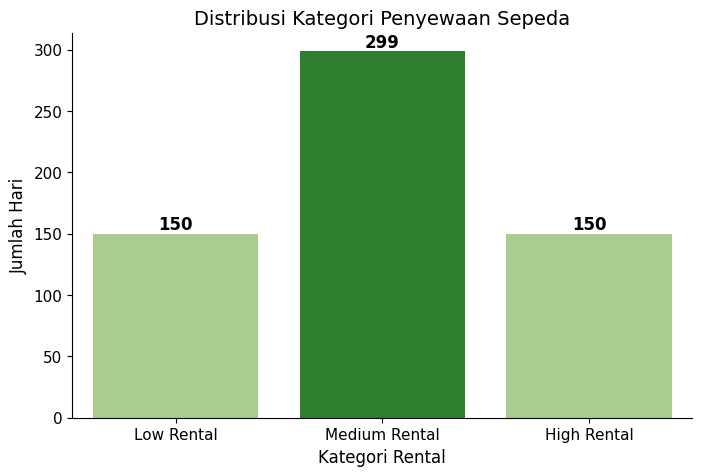

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
# Hitung kuartil
q1 = df_cleaned_final["cnt"].quantile(0.25)
q3 = df_cleaned_final["cnt"].quantile(0.75)

# Buat kategori rental berdasarkan kuartil
def categorize_rental(count):
    if count < q1:
        return "Low Rental"
    elif count > q3:
        return "High Rental"
    else:
        return "Medium Rental"

df_cleaned_final["rental_category"] = df_cleaned_final["cnt"].apply(categorize_rental)

# Pastikan urutan kategori benar
category_order = ["Low Rental", "Medium Rental", "High Rental"]
df_cleaned_final["rental_category"] = pd.Categorical(df_cleaned_final["rental_category"], categories=category_order, ordered=True)

# Hitung jumlah masing-masing kategori
category_counts = df_cleaned_final["rental_category"].value_counts().reindex(category_order)  # Reorder agar sesuai kategori

# Warna dasar dan highlight
base_color = "#A6D785"  # Light green
highlight_color = "#228B22"  # Dark green

# Tentukan warna untuk batang tertinggi
colors = [highlight_color if count == max(category_counts) else base_color for count in category_counts]

# Visualisasi jumlah penyewaan berdasarkan kategori
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color="black")

# Atur tampilan
plt.title("Distribusi Kategori Penyewaan Sepeda", fontsize=14)
plt.xlabel("Kategori Rental", fontsize=12)
plt.ylabel("Jumlah Hari", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Hapus garis latar
sns.despine()

# Tampilkan plot
plt.show()

# Tampilkan 5 data pertama untuk verifikasi
df.head()


**Insight:**

1. **Kategori "Medium Rental" Mendominasi**  
   - Sebagian besar hari dalam dataset memiliki jumlah penyewaan **sedang** (Medium Rental), dengan **299 hari** dalam kategori ini.  
   - Ini menunjukkan bahwa pola penyewaan sepeda cenderung berada di tingkat **menengah**, bukan ekstrim rendah atau tinggi.  

2. **Jumlah Hari untuk "Low" dan "High Rental" Sama**  
   - Kategori **Low Rental** (rendah) dan **High Rental** (tinggi) masing-masing terjadi selama **150 hari**.  
   - Ini berarti jumlah hari dengan penyewaan yang sangat rendah sama banyaknya dengan hari yang sangat tinggi.  

3. **Distribusi yang Simetris**  
   - Pola distribusi ini mengindikasikan bahwa jumlah penyewaan **berpusat di tengah** (kategori Medium), dengan jumlah hari penyewaan rendah dan tinggi **seimbang**.  
   - Hal ini bisa menunjukkan **tren musiman** atau adanya faktor eksternal seperti cuaca atau hari libur yang memengaruhi penyewaan.  

4. **Potensi untuk Meningkatkan High Rental**  
   - Karena jumlah hari dengan penyewaan tinggi **tidak mendominasi**, ada peluang untuk meningkatkan jumlah hari dalam kategori **High Rental**.  
   - Bisa dilakukan dengan promosi, diskon di akhir pekan, atau strategi pemasaran lain untuk meningkatkan jumlah pelanggan pada hari-hari tertentu.  

📌 **Kesimpulan**  
Data ini menunjukkan bahwa tren penyewaan sepeda **lebih sering berada di level menengah** dibandingkan ekstrem rendah atau tinggi. Namun, ada potensi untuk meningkatkan jumlah hari dengan penyewaan tinggi melalui strategi bisnis yang tepat. 🚴💡

### Time Series Analis

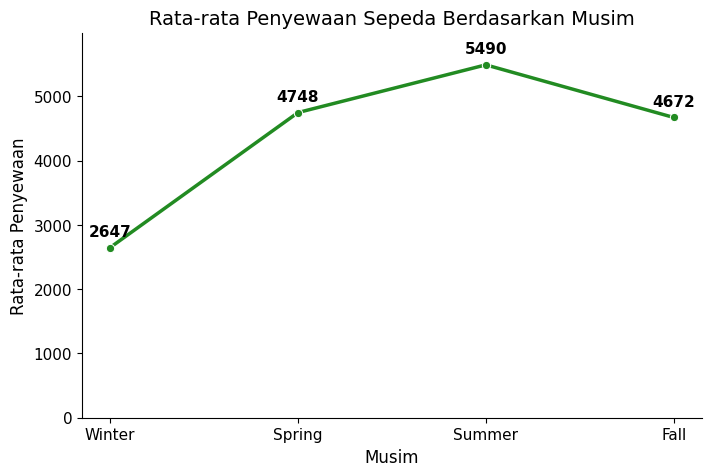

In [38]:
# Hitung rata-rata jumlah penyewaan per musim
seasonal_trend = df_cleaned_final.groupby("season")["cnt"].mean()

# Visualisasi tren musiman
plt.figure(figsize=(8, 5))
ax = sns.lineplot(
    x=seasonal_trend.index,
    y=seasonal_trend.values,
    marker="o",
    color="#228B22",  # Dark Green
    linewidth=2.5
)

# Tambahkan angka di setiap titik
for x, y in zip(seasonal_trend.index, seasonal_trend.values):
    ax.annotate(f"{int(y)}", (x, y), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=11, fontweight='bold', color="black")

# Atur sumbu Y agar mulai dari 0
plt.ylim(0, seasonal_trend.max() + 500)  # Tambahkan margin di atas

# Atur label dan judul
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xlabel("Musim", fontsize=12)
plt.xticks(ticks=[1, 2, 3, 4], labels=["Winter", "Spring", "Summer", "Fall"], fontsize=11)
plt.yticks(fontsize=11)

# Hapus garis latar untuk tampilan lebih bersih
sns.despine()

# Tampilkan plot
plt.show()


**Insight:**

1. **Penyewaan Sepeda Terendah di Musim Dingin (Winter - 2647)**  
   - Penyewaan sepeda **paling sedikit** terjadi di musim dingin.  
   - Faktor cuaca dingin, hujan, atau salju kemungkinan besar menjadi penyebab utama turunnya minat pengguna.  

2. **Peningkatan Signifikan di Musim Semi (Spring - 4748)**  
   - Saat musim semi, jumlah penyewaan meningkat **hampir dua kali lipat** dibandingkan musim dingin.  
   - Hal ini mungkin karena cuaca mulai membaik, lebih banyak orang beraktivitas di luar ruangan.  

3. **Puncak Penyewaan Terjadi di Musim Panas (Summer - 5490)**  
   - Penyewaan mencapai **puncak tertinggi** selama musim panas.  
   - Cuaca cerah dan liburan musim panas bisa menjadi faktor yang meningkatkan aktivitas bersepeda.  

4. **Sedikit Penurunan di Musim Gugur (Fall - 4672)**  
   - Penyewaan mulai **menurun kembali** saat memasuki musim gugur.  
   - Faktor cuaca yang mulai dingin dan persiapan musim dingin kemungkinan berkontribusi terhadap penurunan ini.  

📌 **Kesimpulan & Rekomendasi**  
- **Fokus pada promosi saat musim dingin**: Bisa dengan menawarkan diskon atau fasilitas tambahan seperti pakaian hangat bagi penyewa.  
- **Manfaatkan musim panas**: Karena ini adalah puncak penyewaan, bisa dilakukan strategi pemasaran seperti event sepeda atau paket langganan spesial.  
- **Antisipasi musim gugur**: Mengadakan promo menjelang musim gugur agar penurunan tidak terlalu tajam.  

🚴 **Pola ini menunjukkan bahwa faktor cuaca sangat memengaruhi tren penyewaan sepeda. Memahami pola musiman ini bisa membantu dalam merancang strategi bisnis yang lebih efektif!** 💡

### Korelasi dan Uji T-Test

Korelasi antar variabel:
               season  weathersit       cnt
season      1.000000    0.018290  0.429981
weathersit  0.018290    1.000000 -0.233622
cnt         0.429981   -0.233622  1.000000


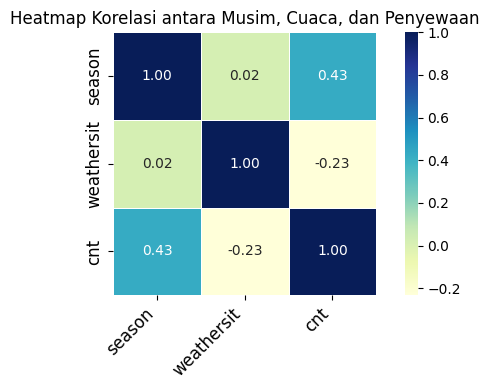

Hasil Uji Normalitas Shapiro-Wilk: p-value = 2.4204975751673494e-08
Data tidak terdistribusi normal, pertimbangkan uji non-parametrik seperti Mann-Whitney.
Hasil Uji ANOVA: F-statistic = 108.90717777150991, p-value = 3.2826888971481077e-56


<ipython-input-39-48377dc17e33>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_avg_rentals.index, y=weather_avg_rentals.values, palette=colors)


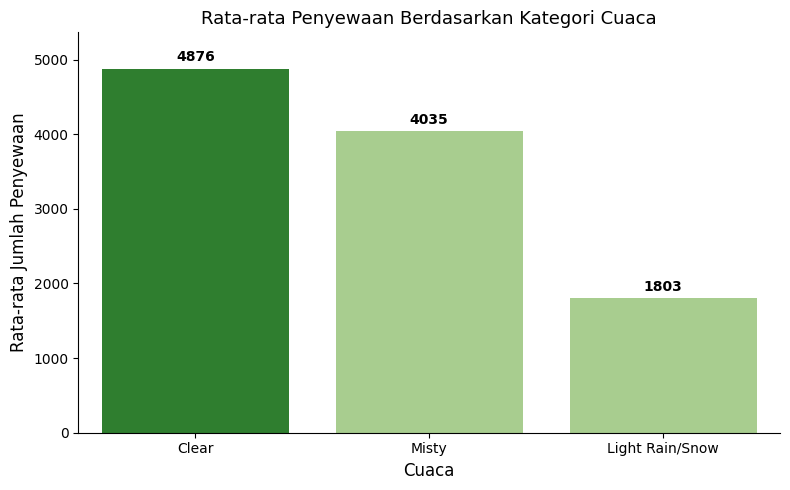

<ipython-input-39-48377dc17e33>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_avg_rentals.index, y=season_avg_rentals.values, palette=colors)


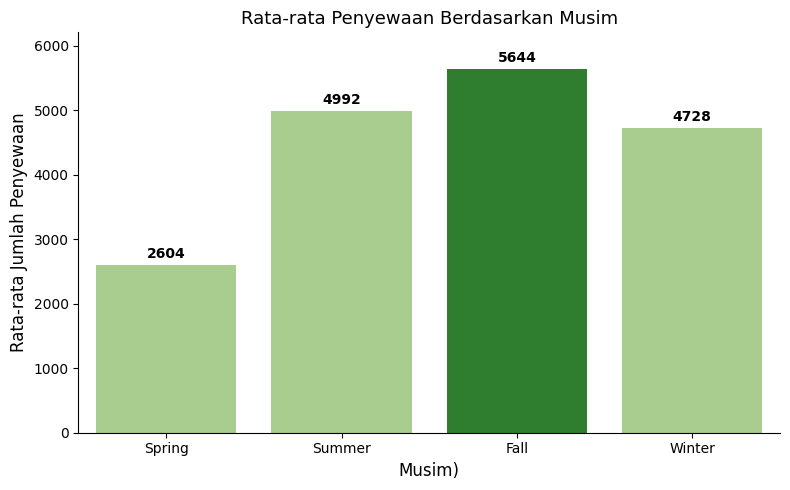

In [39]:
# Hitung korelasi antara cuaca, musim, dan penyewaan
correlation = df_cleaned_final[["season", "weathersit", "cnt"]].corr()
print("Korelasi antar variabel:\n", correlation)

# Visualisasi korelasi dengan Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Heatmap Korelasi antara Musim, Cuaca, dan Penyewaan", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Pastikan layout rapi
plt.show()

from scipy.stats import shapiro, f_oneway

# Uji Normalitas untuk Jumlah Penyewaan Sepeda
stat, p_shapiro = shapiro(df_cleaned_final["cnt"])
print(f"Hasil Uji Normalitas Shapiro-Wilk: p-value = {p_shapiro}")

# Jika p_shapiro > 0.05, data berdistribusi normal
if p_shapiro > 0.05:
    print("Data terdistribusi normal, lanjutkan dengan t-test atau ANOVA.")
else:
    print("Data tidak terdistribusi normal, pertimbangkan uji non-parametrik seperti Mann-Whitney.")

# Uji ANOVA untuk melihat pengaruh musim terhadap penyewaan sepeda
anova_result = f_oneway(
    df_cleaned_final[df_cleaned_final["season"] == 1]["cnt"],
    df_cleaned_final[df_cleaned_final["season"] == 2]["cnt"],
    df_cleaned_final[df_cleaned_final["season"] == 3]["cnt"],
    df_cleaned_final[df_cleaned_final["season"] == 4]["cnt"]
)

print(f"Hasil Uji ANOVA: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


# Bar Plot: Rata-rata penyewaan berdasarkan kategori cuaca
plt.figure(figsize=(8, 5))
weather_avg_rentals = df.groupby("weathersit")["cnt"].mean()

# Warna dasar dan highlight
base_color = "#A6D785"  # Light green
highlight_color = "#228B22"  # Dark green
colors = [highlight_color if val == weather_avg_rentals.max() else base_color for val in weather_avg_rentals.values]

sns.barplot(x=weather_avg_rentals.index, y=weather_avg_rentals.values, palette=colors)

# Tambahkan label angka di atas batang
for i, value in enumerate(weather_avg_rentals.values):
    plt.text(i, value + 100, f"{int(value)}", ha="center", fontsize=10, fontweight="bold", color="black")

plt.title("Rata-rata Penyewaan Berdasarkan Kategori Cuaca", fontsize=13)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.xlabel("Cuaca", fontsize=12)
plt.ylim(0, weather_avg_rentals.max() * 1.1)
plt.xticks(ticks=[0, 1, 2], labels=["Clear", "Misty", "Light Rain/Snow"], fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()  # Pastikan layout rapi
plt.show()

# Bar Plot: Rata-rata penyewaan per musim
plt.figure(figsize=(8, 5))
season_avg_rentals = df.groupby("season")["cnt"].mean()

# Warna dasar dan highlight
colors = [highlight_color if val == season_avg_rentals.max() else base_color for val in season_avg_rentals.values]

sns.barplot(x=season_avg_rentals.index, y=season_avg_rentals.values, palette=colors)

# Tambahkan label angka di atas batang
for i, value in enumerate(season_avg_rentals.values):
    plt.text(i, value + 100, f"{int(value)}", ha="center", fontsize=10, fontweight="bold", color="black")

plt.title("Rata-rata Penyewaan Berdasarkan Musim", fontsize=13)
plt.xlabel("Musim)", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.ylim(0, season_avg_rentals.max() * 1.1)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"], fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()  # Pastikan layout rapi
plt.show()


**Insight:**

1. **Rata-rata Penyewaan Sepeda Berdasarkan Musim**  
   - Penyewaan sepeda **tertinggi** terjadi pada **musim gugur (Fall)**, dengan rata-rata **5.644 penyewaan per hari**.  
   - Penyewaan **terendah** terjadi di **musim semi (Spring)**, dengan rata-rata hanya **2.604 penyewaan per hari**.  
   - Secara umum, pola penyewaan mengikuti tren **Spring → Summer → Fall (tertinggi) → Winter**.  
   - Hal ini menunjukkan bahwa musim gugur adalah waktu yang paling menguntungkan untuk bisnis rental sepeda, sementara musim semi cenderung memiliki permintaan terendah.

2. Heatmap Korelasi antara Musim, Cuaca, dan Penyewaan**  
   - **Musim memiliki korelasi positif dengan jumlah penyewaan sepeda (0.43)**, yang berarti jumlah penyewaan cenderung meningkat pada musim tertentu, terutama saat mendekati musim gugur.  
   - **Cuaca memiliki korelasi negatif dengan penyewaan sepeda (-0.23)**, menunjukkan bahwa semakin buruk kondisi cuaca (hujan/salju), semakin sedikit jumlah sepeda yang disewa.  
   - **Musim dan cuaca memiliki korelasi sangat lemah (0.018)**, menunjukkan bahwa kondisi cuaca hampir tidak dipengaruhi oleh musim.  

3. **Rata-rata Penyewaan Berdasarkan Kategori Cuaca**  
   - Saat cuaca **cerah** (**kategori 1**), rata-rata penyewaan tertinggi (**4.876 sepeda per hari**).  
   - Saat cuaca **berkabut/mendung** (**kategori 2**), rata-rata penyewaan menurun (**4.035 sepeda per hari**).  
   - Saat cuaca **buruk dengan hujan ringan atau salju** (**kategori 3**), penyewaan turun drastis menjadi **1.803 sepeda per hari**.  
   - Ini menunjukkan bahwa kondisi cuaca yang buruk sangat berdampak pada minat masyarakat dalam menyewa sepeda.

### **Kesimpulan dan Rekomendasi**  
1. **Musim gugur adalah waktu terbaik untuk bisnis rental sepeda**, sementara musim semi memiliki permintaan terendah.  
2. **Cuaca buruk (hujan/salju) sangat menurunkan penyewaan**, sehingga strategi promosi seperti **diskon atau layanan tambahan** dapat diterapkan saat cuaca tidak mendukung.  
3. **Sebagian besar hari memiliki penyewaan dalam kategori "Medium Rental"**, sehingga jumlah sepeda yang tersedia harus disesuaikan agar efisien.  
4. Hasil uji normalitas Shapiro-Wilk menunjukkan p-value = **2.42e-08**, yang mengindikasikan bahwa data **tidak terdistribusi normal**, sehingga uji non-parametrik seperti **Mann-Whitney U Test** dapat dipertimbangkan. Sementara itu, hasil uji ANOVA menghasilkan **F-statistic = 108.91** dengan **p-value = 3.28e-56**, yang menunjukkan adanya **perbedaan signifikan** dalam jumlah penyewaan berdasarkan kategori yang diuji. Dengan demikian, hasil ini mengonfirmasi bahwa perbedaan dalam jumlah penyewaan **sangat signifikan secara statistik** dan bukan terjadi secara kebetulan.
5. **Bisnis rental dapat mempertimbangkan sepeda tahan cuaca atau promo khusus saat musim dingin untuk meningkatkan penyewaan.**



## Conclusion

💡 Kesimpulan Pertanyaan 1:

Cuaca dan musim berpengaruh signifikan terhadap jumlah penyewaan sepeda. Pengguna cenderung lebih banyak menyewa sepeda pada musim gugur & musim panas. Cuaca buruk mengurangi jumlah penyewaan secara signifikan.
<br><br><br>

💡 Kesimpulan Pertanyaan 2:

Penyewaan sepeda lebih tinggi pada hari kerja, kemungkinan besar karena penggunaan untuk transportasi kerja atau sekolah. Pada akhir pekan, jumlah penyewaan berkurang, kemungkinan karena orang lebih sedikit bepergian atau lebih memilih kendaraan lain untuk rekreasi.